In [1]:
from binance_historical_data import BinanceDataDumper

data_dumper = BinanceDataDumper(
    path_dir_where_to_dump=".",
    asset_class="spot",  # spot, um, cm
    data_type="klines",  # aggTrades, klines, trades
    data_frequency="1m",
)

print(data_dumper.get_list_all_trading_pairs())

['ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'QTUMETH', 'EOSETH', 'SNTETH', 'BNTETH', 'BCCBTC', 'GASBTC', 'BNBETH', 'BTCUSDT', 'ETHUSDT', 'HSRBTC', 'OAXETH', 'DNTETH', 'MCOETH', 'ICNETH', 'MCOBTC', 'WTCBTC', 'WTCETH', 'LRCBTC', 'LRCETH', 'QTUMBTC', 'YOYOBTC', 'OMGBTC', 'OMGETH', 'ZRXBTC', 'ZRXETH', 'STRATBTC', 'STRATETH', 'SNGLSBTC', 'SNGLSETH', 'BQXBTC', 'BQXETH', 'KNCBTC', 'KNCETH', 'FUNBTC', 'FUNETH', 'SNMBTC', 'SNMETH', 'NEOETH', 'IOTABTC', 'IOTAETH', 'LINKBTC', 'LINKETH', 'XVGBTC', 'XVGETH', 'SALTBTC', 'SALTETH', 'MDABTC', 'MDAETH', 'MTLBTC', 'MTLETH', 'SUBBTC', 'SUBETH', 'EOSBTC', 'SNTBTC', 'ETCETH', 'ETCBTC', 'MTHBTC', 'MTHETH', 'ENGBTC', 'ENGETH', 'DNTBTC', 'ZECBTC', 'ZECETH', 'BNTBTC', 'ASTBTC', 'ASTETH', 'DASHBTC', 'DASHETH', 'OAXBTC', 'ICNBTC', 'BTGBTC', 'BTGETH', 'EVXBTC', 'EVXETH', 'REQBTC', 'REQETH', 'VIBBTC', 'VIBETH', 'HSRETH', 'TRXBTC', 'TRXETH', 'POWRBTC', 'POWRETH', 'ARKBTC', 'ARKETH', 'YOYOETH', 'XRPBTC', 'XRPETH', 'MODBTC', 'MODETH', 'ENJBTC', 'ENJETH', 'STORJBTC', 'ST

In [2]:
data_dumper.dump_data(tickers=["NEARUSDT"])

---> Found overall tickers: 2287
---> Filter to asked tickers: 1
------> Tickers left: 1
Download full data for 1 tickers: 
---> Data will be saved here: /mnt/storage/dima/Doc/Documents/Особисте/Проєкти/Projects/price_prediction_experiment/spot
---> Data Frequency: 1m
---> Start Date: 20170101
---> End Date: 20230901


Tickers:   0%|          | 0/1 [00:00<?, ?it/s]

monthly files to download:   0%|          | 0/1 [00:00<?, ?files/s]

daily files to download: 0files [00:00, ?files/s]

Tried to dump data for 1 tickers:
---> For NEARUSDT new data saved for: 0 months 0 days


In [3]:
import pandas as pd
import numpy as np
import os

filenames = next(os.walk("./spot/monthly/klines/NEARUSDT/1m"), (None, None, []))[2]  # [] if no file

columns = [
    "Open time",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Close time",
    "Quote asset volume",
    "Number of trades",
    "Taker buy base asset volume",
    "Taker buy quote asset volume",
    "Ignore"
]

df = pd.DataFrame(columns=columns)

for f in filenames:
    new_df = pd.read_csv(f"./spot/monthly/klines/NEARUSDT/1m/{f}", header=None, names=columns)
    df = pd.concat([df, new_df])
df = df.sort_values(by="Open time")
df

/tmp/ipykernel_35237/777231159.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df])


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1602651600000,1.3000,1.8800,1.3000,1.3760,1429560.44,1602651659999,2.313165e+06,1848,520043.50,837306.088337,0
1,1602651660000,1.3759,1.4000,1.1111,1.2493,987505.68,1602651719999,1.205528e+06,1392,614158.78,747451.518743,0
2,1602651720000,1.2489,1.3593,1.1660,1.2552,549711.33,1602651779999,6.942747e+05,1103,277203.12,349648.438905,0
3,1602651780000,1.2499,1.2500,1.1359,1.1742,343258.80,1602651839999,4.081314e+05,773,170461.39,202748.271257,0
4,1602651840000,1.1754,1.2752,1.1753,1.2300,243382.88,1602651899999,2.965310e+05,440,170472.03,207510.362489,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44635,1690847700000,1.3710,1.3710,1.3690,1.3690,5932.20,1690847759999,8.131457e+03,23,0.00,0.000000,0
44636,1690847760000,1.3690,1.3690,1.3690,1.3690,81.30,1690847819999,1.112997e+02,3,81.30,111.299700,0
44637,1690847820000,1.3690,1.3700,1.3690,1.3690,1278.00,1690847879999,1.749664e+03,10,438.10,599.840400,0
44638,1690847880000,1.3690,1.3700,1.3690,1.3700,468.60,1690847939999,6.415331e+02,6,468.60,641.533100,0


In [4]:
dataset = df.loc[:, [
                        "Open",
                        "High",
                        "Low",
                        "Close",
                        "Volume",
                        "Quote asset volume"]]
dataset[-256:]

,Open,High,Low,Close,Volume,Quote asset volume
44384,1.374,1.375,1.374,1.375,1613.1,2217.9838
44385,1.374,1.375,1.372,1.372,3312.5,4550.7748
44386,1.373,1.374,1.373,1.374,1857.0,2551.1578
44387,1.374,1.374,1.373,1.373,228.3,313.5524
44388,1.373,1.373,1.373,1.373,49.8,68.3754
...,...,...,...,...,...,...
44635,1.371,1.371,1.369,1.369,5932.2,8131.4573
44636,1.369,1.369,1.369,1.369,81.3,111.2997
44637,1.369,1.370,1.369,1.369,1278.0,1749.6635
44638,1.369,1.370,1.369,1.370,468.6,641.5331


In [5]:
difference_dataset = dataset.diff().dropna().reset_index(drop=True)
difference_dataset[-256:]

,Open,High,Low,Close,Volume,Quote asset volume
1468259,0.000,0.001,0.000,0.001,1604.0,2205.4804
1468260,0.000,0.000,-0.002,-0.003,1699.4,2332.7910
1468261,-0.001,-0.001,0.001,0.002,-1455.5,-1999.6170
1468262,0.001,0.000,0.000,-0.001,-1628.7,-2237.6054
1468263,-0.001,-0.001,0.000,0.000,-178.5,-245.1770
...,...,...,...,...,...,...
1468510,0.000,0.000,-0.002,-0.002,5365.1,7353.9632
1468511,-0.002,-0.002,0.000,0.000,-5850.9,-8020.1576
1468512,0.000,0.001,0.000,0.000,1196.7,1638.3638
1468513,0.000,0.000,0.000,0.001,-809.4,-1108.1304


In [6]:
import numpy as np

signed_log_transformed_df = np.sign(difference_dataset) * np.log1p(np.abs(difference_dataset))
signed_log_transformed_df

,Open,High,Low,Close,Volume,Quote asset volume
0,0.073158,-0.392042,-0.173029,-0.119293,-12.999191,-13.917741
1,-0.119559,-0.039894,0.053446,0.005883,-12.989507,-13.144623
2,0.001000,-0.103729,-0.029656,-0.077887,-12.237831,-12.564252
3,-0.071855,0.024888,0.038644,0.054299,-11.511694,-11.622689
4,0.052877,-0.004589,0.024107,0.019803,-10.906854,-11.076861
...,...,...,...,...,...,...
1468510,0.000000,0.000000,-0.001998,-0.001998,8.587857,8.903131
1468511,-0.001998,-0.001998,0.000000,0.000000,-8.674522,-8.989838
1468512,0.000000,0.001000,0.000000,0.000000,7.088158,7.402064
1468513,0.000000,0.000000,0.000000,0.001000,-6.697528,-7.011332


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch
import torch.nn as nn
import math

torch.cuda.empty_cache()

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
dataset_scaled = scaler.fit_transform(signed_log_transformed_df)
dataset_scaled

array([[-0.34005162, -0.57191832, -0.59973493, -0.46108209, -0.87279332,
        -0.80033264],
       [-0.47061213, -0.35336743, -0.4078846 , -0.37677812, -0.87215073,
        -0.7564783 ],
       [-0.38893677, -0.39298518, -0.47828158, -0.43319544, -0.82227518,
        -0.72355731],
       ...,
       [-0.38961391, -0.32798833, -0.45315958, -0.38074001,  0.46005141,
         0.40901256],
       [-0.38961391, -0.32860864, -0.45315958, -0.38006686, -0.45466256,
        -0.4085733 ],
       [-0.38893677, -0.32860864, -0.45231289, -0.38074001,  0.4237481 ,
         0.37803332]])

In [8]:
# Create sequences
SEQUENCE_LENGTH = 64
PREDICT_LENGTH = 32
X, y = [], []
for i in range(len(dataset_scaled) - SEQUENCE_LENGTH - PREDICT_LENGTH + 1):
    X.append(dataset_scaled[i:i + SEQUENCE_LENGTH])
    y.append(dataset_scaled[i + SEQUENCE_LENGTH:i + SEQUENCE_LENGTH + PREDICT_LENGTH])

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create DataLoaders
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=1024, shuffle=True)

test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=1024, shuffle=False)


/tmp/ipykernel_35237/3075395133.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  X = torch.tensor(X, dtype=torch.float32)


In [9]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, predict_length):
        super(LSTMModel, self).__init__()
        hidden_dim = 64  # Number of hidden units
        num_layers = 1  # Number of LSTM layers

        self.predict_length = predict_length
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Assume the output sequence has the same dimensionality as the input sequence
        self.linear = nn.Linear(hidden_dim, input_dim * predict_length)

    def forward(self, x):
        out, (_, _) = self.lstm(x)

        # Use the last LSTM output as input to the fully connected layer
        out = self.linear(out[:, -1, :])

        # Reshape the output to have the same sequence length as PREDICT_LENGTH
        out = out.view(-1, self.predict_length, x.size(2))

        return out


class BaselineModel2(nn.Module):
    def __init__(self, input_dim, predict_length):
        super(BaselineModel2, self).__init__()
        self.predict_length = predict_length

        self.sequential = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 64),
            nn.LeakyReLU(),
            nn.Linear(64, input_dim * predict_length),
        )

    def forward(self, x):
        # Reshape the input to 2D for feeding into the fully connected layers
        reshaped = x[:, -1, :].reshape((x.size()[0], x.size()[2]))

        # Get the output from the sequential model
        out = self.sequential(reshaped)

        # Reshape to [batch_size, PREDICT_LENGTH, input_dim]
        out = out.view(-1, self.predict_length, x.size(2))

        return out


class FFSequenceModel(nn.Module):
    def __init__(self, input_dim, predict_length):
        super(FFSequenceModel, self).__init__()
        self.predict_length = predict_length

        self.sequential = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim * SEQUENCE_LENGTH, 256),
            nn.LeakyReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(32, input_dim * predict_length),
        )

    def forward(self, x):
        out = self.sequential(x)

        # Reshape the output to [batch_size, PREDICT_LENGTH, input_dim]
        out = out.view(-1, self.predict_length, x.size(2))

        return out


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x


class TransformerForecast(nn.Module):
    def __init__(self, d_model, predict_length, nhead=3, num_layers=1):
        super(TransformerForecast, self).__init__()
        self.predict_length = predict_length

        self.positional_encoder = PositionalEncoding(d_model)

        self.encoder_layer = nn.TransformerEncoderLayer(d_model, nhead)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)

        self.decoder_layer = nn.TransformerDecoderLayer(d_model, nhead)
        self.transformer_decoder = nn.TransformerDecoder(self.decoder_layer, num_layers=num_layers)

        self.final_layer = nn.Linear(d_model, d_model)

    def forward(self, x):
        # Transpose from [batch_size, sequence_length, features] to [sequence_length, batch_size, features]
        x = x.transpose(0, 1)
        x = self.positional_encoder(x)
        x = self.transformer_encoder(x)

        tgt = torch.zeros(self.predict_length, x.size(1), x.size(2)).to(x.device)
        tgt = self.positional_encoder(tgt)

        output = self.transformer_decoder(tgt, x)
        output = self.final_layer(output)

        # Transpose back to [batch_size, PREDICT_LENGTH, features]
        output = output.transpose(0, 1)
        return output



In [10]:
def train_test_model(model, epochs, lr=0.01):
    # Define loss and optimizer
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-6)
    scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1, verbose=True)

    # Training the model
    for epoch in range(epochs):
        model.train()
        avg_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            predictions = model(batch_X.cuda())
            loss = loss_function(predictions, batch_y.cuda())
            avg_loss += loss.item()
            loss.backward()
            optimizer.step()
        avg_loss /= len(train_loader)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}")
        scheduler.step(avg_loss)

    # Testing the model
    model.eval()
    with torch.no_grad():
        test_loss = 0
        for batch_X, batch_y in test_loader:
            predictions = model(batch_X.cuda())
            test_loss += loss_function(predictions, batch_y.cuda()).item()
        test_loss /= len(test_loader)

    print(f"Test Loss: {test_loss}")
    print()
    return model


INPUT_DIM = 6  # Number of features in dataset

model = train_test_model(FFSequenceModel(INPUT_DIM, PREDICT_LENGTH).cuda(), 1)

Epoch 1/1, Loss: 0.0897756669061485
Test Loss: 0.08891171615363823


In [11]:
model = train_test_model(model, 50, 0.001)

Epoch 1/50, Loss: 0.08880387500540218
Epoch 2/50, Loss: 0.08877620784858693
Epoch 3/50, Loss: 0.088765936118055
Epoch 4/50, Loss: 0.08876044183715566
Epoch 5/50, Loss: 0.08875219149934885
Epoch 6/50, Loss: 0.08874783612424139
Epoch 7/50, Loss: 0.0887426995116089
Epoch 8/50, Loss: 0.08873264250900281
Epoch 9/50, Loss: 0.0887266445203773
Epoch 10/50, Loss: 0.08872513187360985
Epoch 11/50, Loss: 0.08872123412920652
Epoch 12/50, Loss: 0.0887184907977291
Epoch 13/50, Loss: 0.08871924172506879
Epoch 14/50, Loss: 0.08871567487070303
Epoch 15/50, Loss: 0.08871399667792132
Epoch 00015: reducing learning rate of group 0 to 1.0000e-04.
Epoch 16/50, Loss: 0.08869150504296737
Epoch 17/50, Loss: 0.08868607071875417
Epoch 18/50, Loss: 0.08868482076987844
Epoch 19/50, Loss: 0.088682995065989
Epoch 20/50, Loss: 0.08868063404567476
Epoch 21/50, Loss: 0.088677661685312
Epoch 22/50, Loss: 0.08867520440188052
Epoch 23/50, Loss: 0.08867280139053264
Epoch 24/50, Loss: 0.08867045892453028
Epoch 25/50, Loss: 0

In [12]:
is_nan_inf = torch.stack([(torch.isnan(p) | torch.isinf(p)).any() for p in model.parameters()]).any()
is_nan_inf

tensor(False, device='cuda:0')

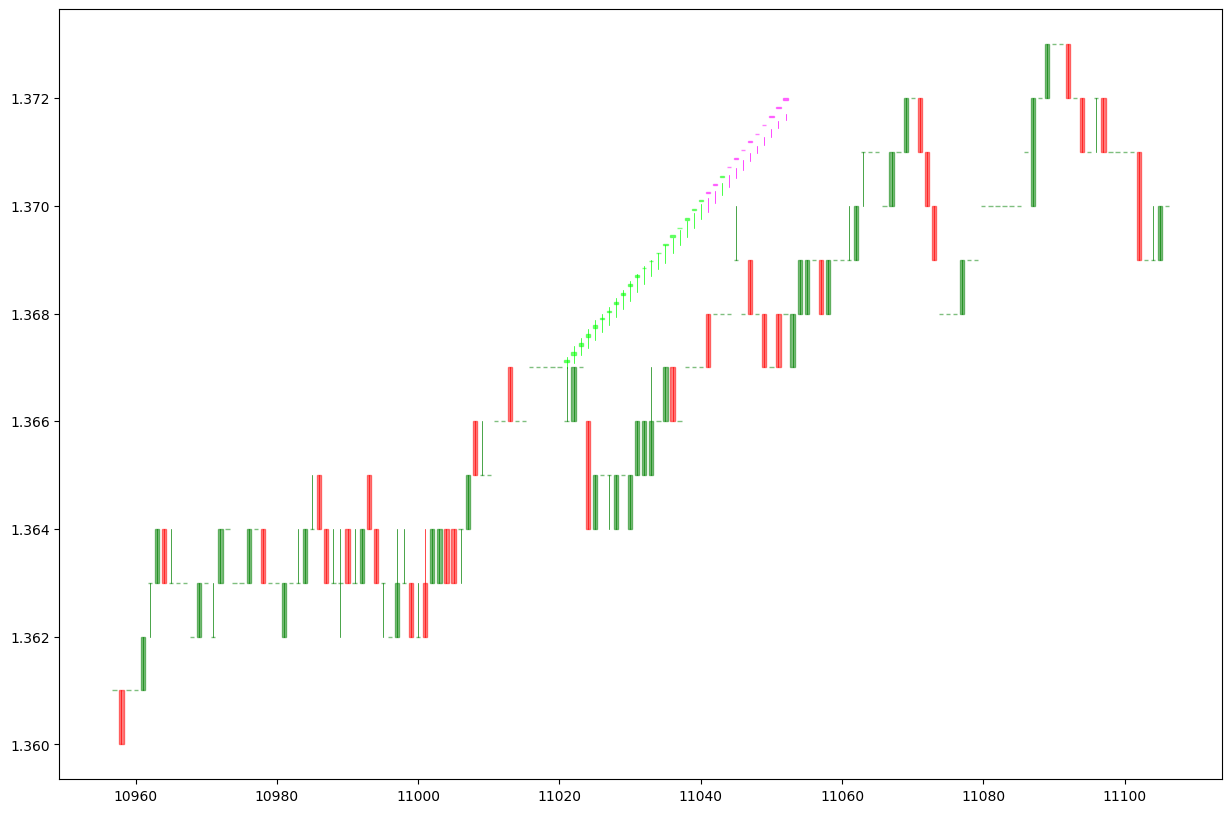

In [15]:
# draw candlestick chart from model predictions
CHART_SIZE = 150

sample_range = dataset_scaled[-CHART_SIZE:]


def inverse_signed_log_transform(x):
    return np.sign(x) * (np.exp(np.abs(x)) - 1)


def inverse_preprocessing(original_start, x):
    x = inverse_signed_log_transform(scaler.inverse_transform(x))

    reversed_array = np.zeros_like(x)
    reversed_array[0] = original_start + x[0]
    for i in range(1, x.shape[0]):
        reversed_array[i] = reversed_array[i - 1] + x[i]
    return reversed_array


# Reverse the difference transformation
original_start = dataset.iloc[[-CHART_SIZE - 1]]
candlesticks = inverse_preprocessing(original_start, sample_range)

predict_sequence = np.concatenate((sample_range[:SEQUENCE_LENGTH], np.zeros((PREDICT_LENGTH, INPUT_DIM))),
                                  axis=0)

# Prepare the model input sequence
predict_sequence_input = sample_range[-SEQUENCE_LENGTH:].reshape((1, SEQUENCE_LENGTH, -1)).astype(np.float32)

model.eval()
with torch.no_grad():
    a = torch.from_numpy(predict_sequence_input).cuda()
    predicted_output = model(a).cpu().numpy()

# Assuming predicted_output is of shape (batch_size, PREDICT_LENGTH, INPUT_DIM)
# And that batch_size is 1
predicted_sequence = predicted_output[0]

# Replace the zeros with the predicted values
predict_sequence[-PREDICT_LENGTH:] = predicted_sequence

# Continue with inverse preprocessing
predict_sequence = inverse_preprocessing(original_start, predict_sequence)

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Create a DataFrame from the 'candlesticks' array
columns = ["Open", "High", "Low", "Close", "Volume", "Quote asset volume"]
candlesticks_df = pd.DataFrame(candlesticks, columns=columns)
candlesticks_pred_df = pd.DataFrame(predict_sequence, columns=columns)

# Adding a fake date index (mplfinance needs this)
candlesticks_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_df.shape[0])
candlesticks_df['Date'] = candlesticks_df['Date'].apply(mdates.date2num)
candlesticks_pred_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_pred_df.shape[0])
candlesticks_pred_df['Date'] = candlesticks_pred_df['Date'].apply(mdates.date2num)

candlesticks_pred_df = candlesticks_pred_df.iloc[SEQUENCE_LENGTH:]

# Reordering columns to fit mplfinance requirements
candlesticks_df = candlesticks_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
candlesticks_pred_df = candlesticks_pred_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

candlestick_ohlc(ax, candlesticks_pred_df.values, width=0.6, colorup='lime', colordown='magenta', alpha=0.5)
candlestick_ohlc(ax, candlesticks_df.values, width=0.6, colorup='g', colordown='r', alpha=0.5)

plt.show()